In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\ASUS\Dropbox\PC\Downloads\Projects\Salary\Salary_Data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df1 = df[["YearsExperience", "Salary"]]

In [6]:
df1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


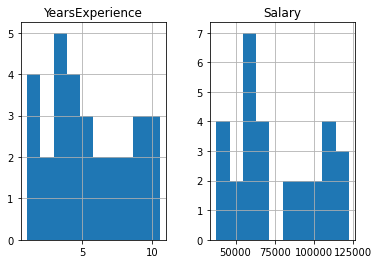

In [7]:
sal = df1[["YearsExperience", "Salary"]]
sal.hist()
plt.show()

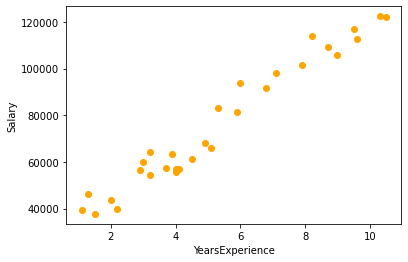

In [8]:
plt.scatter(df1.YearsExperience, df1.Salary, color="orange")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [9]:
x = df1["YearsExperience"]
y = df1["Salary"]

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.8)

In [15]:
mask=np.random.rand(len(df)) < 0.8
train=df1[mask]
test=df1[~mask]

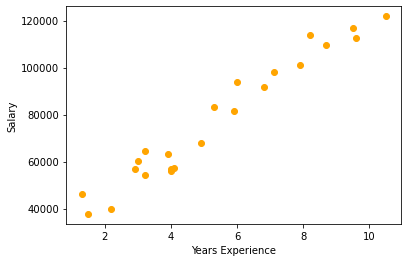

In [16]:
plt.scatter(train.YearsExperience,train.Salary,color="orange")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.show()

In [17]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
x=np.asanyarray(train[["YearsExperience"]])
y=np.asanyarray(train[["Salary"]])
reg.fit(x,y)

print("Slope/Coffcient= ", reg.coef_ )
print("Y-Intercept= ", reg.intercept_)

Slope/Coffcient=  [[9558.57032705]]
Y-Intercept=  [26196.73263235]


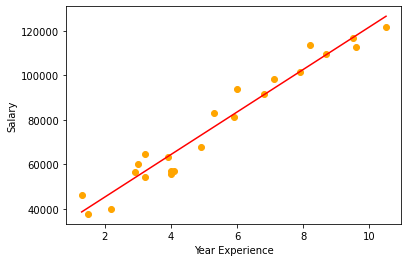

In [19]:
plt.scatter(train.YearsExperience, train.Salary, color="orange")
plt.plot(x, reg.coef_[0][0]*x + reg.intercept_[0], "r" )
plt.xlabel("Year Experience")
plt.ylabel("Salary")
plt.show()

**Testing on the remaining dataset**

In [20]:
from sklearn.metrics import r2_score
x_test=np.asanyarray(test[["YearsExperience"]])
y_test=np.asanyarray(test[["Salary"]])
prd=reg.predict(x_test)

print("mean absolute error= %.2f" % np.mean(np.absolute(prd-y_test)))
print("Mean Square Error=%.2f" % np.mean((prd-y_test)**2))
print("R2 Score %.2f" % r2_score(y_test, prd) )  

mean absolute error= 4958.82
Mean Square Error=31940208.86
R2 Score 0.96


In [21]:
Y=reg.coef_*10.5+reg.intercept_
print("Salary for 10.5 year experience is = %.2f" %Y)

Salary for 10.5 year experience is = 126561.72
